# Suicide Rates Overview 1985 to 2016

In this Exploratory Data Analysis project, I will visualize and analyze the data on suicide rates from 1985 to 2016. I will try to understand the relationship each of the variables may have with the target variable, i.e., suicide rates.

<font size="3.5">**Research Question:** Which factors lead to higher suicide rates?</font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('fivethirtyeight')
sns.set_style('white')

In [2]:
df = pd.read_csv('master.csv')

df.head()

country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years           21      312900   
1  Albania  1987    male  35-54 years           16      308000   
2  Albania  1987  female  15-24 years           14      289700   
3  Albania  1987    male    75+ years            1       21800   
4  Albania  1987    male  25-34 years            9      274300   

   suicides/100k pop country-year  HDI for year  gdp_for_year ($)   \
0               6.71  Albania1987           NaN      2,156,624,900   
1               5.19  Albania1987           NaN      2,156,624,900   
2               4.83  Albania1987           NaN      2,156,624,900   
3               4.59  Albania1987           NaN      2,156,624,900   
4               3.28  Albania1987           NaN      2,156,624,900   

   gdp_per_capita ($)       generation  
0                 796     Generation X  
1                 796           Silent  
2                 796     Generation X  
3                 796  G.I. Generation  
4                 796          Boomers

In [3]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [5]:
df.describe()

year   suicides_no    population  suicides/100k pop  \
count  27820.000000  27820.000000  2.782000e+04       27820.000000   
mean    2001.258375    242.574407  1.844794e+06          12.816097   
std        8.469055    902.047917  3.911779e+06          18.961511   
min     1985.000000      0.000000  2.780000e+02           0.000000   
25%     1995.000000      3.000000  9.749850e+04           0.920000   
50%     2002.000000     25.000000  4.301500e+05           5.990000   
75%     2008.000000    131.000000  1.486143e+06          16.620000   
max     2016.000000  22338.000000  4.380521e+07         224.970000   

       HDI for year  gdp_per_capita ($)  
count   8364.000000        27820.000000  
mean       0.776601        16866.464414  
std        0.093367        18887.576472  
min        0.483000          251.000000  
25%        0.713000         3447.000000  
50%        0.779000         9372.000000  
75%        0.855000        24874.000000  
max        0.944000       126352.000000

In [6]:
df.describe(include='O')

country     sex          age   country-year  gdp_for_year ($)   \
count       27820   27820        27820          27820              27820   
unique        101       2            6           2321               2321   
top     Mauritius  female  55-74 years  Singapore1989     23,616,328,816   
freq          382   13910         4642             12                 12   

          generation  
count          27820  
unique             6  
top     Generation X  
freq            6408

In [7]:
df.isna().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [8]:
df.nunique()

country                 101
year                     32
sex                       2
age                       6
suicides_no            2084
population            25564
suicides/100k pop      5298
country-year           2321
HDI for year            305
 gdp_for_year ($)      2321
gdp_per_capita ($)     2233
generation                6
dtype: int64

We have data on **101 countries**, spanning over **32 years** between _1985_ and _2016_. For each country, there is information about **6 age groups**, **6 generations**, and **2 genders**.

In [9]:
for index in df.nunique().index:
    if df.nunique()[index] < 10:
        print("Unique values in {} column:".format(index))
        print(df[index].unique(), "\n")

Unique values in sex column:
['male' 'female'] 

Unique values in age column:
['15-24 years' '35-54 years' '75+ years' '25-34 years' '55-74 years'
 '5-14 years'] 

Unique values in generation column:
['Generation X' 'Silent' 'G.I. Generation' 'Boomers' 'Millenials'
 'Generation Z'] 



## Data Cleaning:

- '**gdp_for_year (\$)**' column has whitespaces in its column name.
- '**gdp_for_year (\$)**' column has the datatype object, since a comma (',') is used to separate the numbers. It can be converted into integer datatype after the commas are removed.
- '**HDI for year**' column has too many NULL values, instead, I will use the HDI data from UNDP website, which needs some transformation to be merged with the suicide data: http://hdr.undp.org/en/indicators/137506
- '**country-year**' column looks unnecessary, I can recreate it if I need it again.
- '**age**' and '**generation**' columns are categorical, they both refer to 6 different categories. They can be converted into discrete variables to see the correlation between other columns (they will have high correlation between themsevles, but we can ingore it).

In [10]:
df.rename({' gdp_for_year ($) ': 'gdp_for_year ($)'}, axis=1, inplace=True)

In [11]:
df['gdp_for_year ($)'] = df['gdp_for_year ($)'].apply(lambda x: ''.join(x.split(','))).astype('int64')

### HDI Column

In [12]:
hdi = pd.read_csv('Human Development Index (HDI).csv', skiprows=5, engine='python')

In [13]:
#for i in range(1990, 2020):
#    print("'" + str(i) + "', ", end='')

In [14]:
hdi = hdi[['HDI Rank', 'Country', '1990', '1991','1992', '1993', '1994', '1995',
           '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
           '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
           '2014', '2015', '2016', '2017', '2018', '2019']]

In [15]:
hdi_t = hdi[['1990', '1991','1992', '1993', '1994', '1995', '1996', '1997',
     '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
     '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
     '2014', '2015', '2016', '2017', '2018', '2019']].transpose()

In [16]:
hdi_t.columns = hdi['Country']

In [17]:
hdi_new = hdi_t.T.reset_index()

In [18]:
hdi_new.replace('..', np.NaN, inplace=True)

In [19]:
hdi_new['Country'] = hdi_new['Country'].apply(lambda x: x.strip())

In [20]:
hdi_final = pd.melt(hdi_new, id_vars=['Country']).rename({'Country':'country', 'variable': 'year', 'value': 'HDI'}, axis=1)

In [21]:
hdi_final['year'] = hdi_final['year'].astype(np.int64)
hdi_final['HDI'] = hdi_final['HDI'].astype(float)

In [22]:
df = pd.merge(df, hdi_final, how='left', on=['country', 'year'])

In [23]:
df.drop('HDI for year', axis=1, inplace=True)
df.drop('country-year', axis=1, inplace=True)

#### Imputation for HDI column

If you look at the HDI data below closely, you will observe that for each country, HDI values have an upwards, **linear** trend. Therefore, I think it may be reasonable to fill the null values by using **interpolation** method.

In [24]:
hdi.iloc[:60, :20]

HDI Rank                              Country   1990   1991   1992   1993  \
0       169                          Afghanistan  0.302  0.307  0.316  0.312   
1        69                              Albania  0.650  0.631  0.615  0.618   
2        91                              Algeria  0.572  0.576  0.582  0.586   
3        36                              Andorra     ..     ..     ..     ..   
4       148                               Angola     ..     ..     ..     ..   
5        78                  Antigua and Barbuda     ..     ..     ..     ..   
6        46                            Argentina  0.718  0.725  0.730  0.735   
7        81                              Armenia  0.654  0.648  0.618  0.617   
8         8                            Australia  0.871  0.871  0.873  0.876   
9        18                              Austria  0.803  0.808  0.813  0.817   
10       88                           Azerbaijan     ..     ..     ..     ..   
11       58                              Bahamas     ..     ..     ..     ..   
12       42                              Bahrain  0.749  0.755  0.760  0.769   
13      133                           Bangladesh  0.394  0.401  0.410  0.418   
14       58                             Barbados  0.732  0.733  0.733  0.737   
15       53                              Belarus     ..     ..     ..     ..   
16       14                              Belgium  0.813  0.817  0.832  0.845   
17      110                               Belize  0.610  0.614  0.621  0.624   
18      158                                Benin  0.364  0.371  0.375  0.382   
19      129                               Bhutan     ..     ..     ..     ..   
20      107     Bolivia (Plurinational State of)  0.551  0.559  0.566  0.573   
21       73               Bosnia and Herzegovina     ..     ..     ..     ..   
22      100                             Botswana  0.573  0.579  0.577  0.576   
23       84                               Brazil  0.613  0.621  0.627  0.635   
24       47                    Brunei Darussalam  0.767  0.771  0.777  0.781   
25       56                             Bulgaria  0.708  0.705  0.705  0.704   
26      182                         Burkina Faso     ..     ..     ..     ..   
27      185                              Burundi  0.299  0.302  0.299  0.299   
28      126                           Cabo Verde     ..     ..     ..     ..   
29      144                             Cambodia  0.368  0.372  0.377  0.381   
30      153                             Cameroon  0.448  0.445  0.441  0.435   
31       16                               Canada  0.850  0.854  0.857  0.855   
32      188             Central African Republic  0.334  0.328  0.315  0.315   
33      187                                 Chad     ..     ..     ..     ..   
34       43                                Chile  0.706  0.715  0.722  0.715   
35       85                                China  0.499  0.507  0.517  0.527   
36       83                             Colombia  0.603  0.606  0.617  0.624   
37      156                              Comoros     ..     ..     ..     ..   
38      149                                Congo  0.500  0.499  0.499  0.493   
39      175   Congo (Democratic Republic of the)  0.369  0.366  0.361  0.355   
40       62                           Costa Rica  0.665  0.672  0.680  0.687   
41       43                              Croatia  0.677  0.672  0.672  0.674   
42       70                                 Cuba  0.680  0.674  0.667  0.660   
43       33                               Cyprus  0.735  0.738  0.742  0.779   
44       27                              Czechia  0.738  0.733  0.736  0.743   
45      162                        Côte d'Ivoire  0.404  0.404  0.405  0.406   
46       10                              Denmark  0.806  0.811  0.815  0.822   
47      166                             Djibouti     ..     ..     ..     ..   
48       94                             Dominica     ..     ..     ..     ..   
49 

In [25]:
df['HDI'].isna().sum()

5842

In [26]:
df['HDI'] = df['HDI'].interpolate(method = 'linear', limit_direction='both')

In [27]:
df['HDI'].isna().sum()

0

### Age group & Generation group

I will create numerical **age_group** and **generation_group** columns from categorical **age** and **generation** columns.

In [28]:
list(df.groupby(['generation', 'age'])['generation'].count().index)

[('Boomers', '25-34 years'),
 ('Boomers', '35-54 years'),
 ('Boomers', '55-74 years'),
 ('G.I. Generation', '55-74 years'),
 ('G.I. Generation', '75+ years'),
 ('Generation X', '15-24 years'),
 ('Generation X', '25-34 years'),
 ('Generation X', '35-54 years'),
 ('Generation X', '5-14 years'),
 ('Generation Z', '5-14 years'),
 ('Millenials', '15-24 years'),
 ('Millenials', '25-34 years'),
 ('Millenials', '5-14 years'),
 ('Silent', '35-54 years'),
 ('Silent', '55-74 years'),
 ('Silent', '75+ years')]

In [29]:
df['age'].unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

In [30]:
df['generation'].unique()

array(['Generation X', 'Silent', 'G.I. Generation', 'Boomers',
       'Millenials', 'Generation Z'], dtype=object)

In [31]:
def age_group(age):
    if age == '5-14 years':
        return 0
    elif age == '15-24 years':
        return 1
    elif age == '25-34 years':
        return 2
    elif age == '35-54 years':
        return 3
    elif age == '55-74 years':
        return 4
    else:
        return 5
    
def generation_group(generation):
    if generation == 'Generation Z':
        return 0
    elif generation == 'Millenials':
        return 1
    elif generation == 'Generation X':
        return 2
    elif generation == 'Boomers':
        return 3
    elif generation == 'Silent':
        return 4
    else:
        return 5

In [32]:
df['age_group'] = df['age'].apply(age_group)
df['generation_group'] = df['generation'].apply(generation_group)

## Feature Engineering:

### Suicide, Population & Suicide Rates

I will create three new columns:
- 'suicides_no_total',
- 'population_total', and
- 'suicide_rates_total'

These columns are not affected by grouping by age group, gender, generation, etc.

In rest of this notebook, '**suicide counts**' refers to the total number of suicides whereas '**suicide rates**' refer to the total suicides divided by population.

In [33]:
df = df.merge(df.groupby(['country', 'year'])['suicides_no'].sum(), on=['country', 'year'], suffixes=('', '_total'))
df = df.merge(df.groupby(['country', 'year'])['population'].sum(), on=['country', 'year'], suffixes=('', '_total'))
df['suicide_rates_total'] = df['suicides_no_total']*100 / df['population_total']

### Final version of the data

In [34]:
df.head()

country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years           21      312900   
1  Albania  1987    male  35-54 years           16      308000   
2  Albania  1987  female  15-24 years           14      289700   
3  Albania  1987    male    75+ years            1       21800   
4  Albania  1987    male  25-34 years            9      274300   

   suicides/100k pop  gdp_for_year ($)  gdp_per_capita ($)       generation  \
0               6.71        2156624900                 796     Generation X   
1               5.19        2156624900                 796           Silent   
2               4.83        2156624900                 796     Generation X   
3               4.59        2156624900                 796  G.I. Generation   
4               3.28        2156624900                 796          Boomers   

     HDI  age_group  generation_group  suicides_no_total  population_total  \
0  0.615          1                 2                 73           2709600   
1  0.615          3                 4                 73           2709600   
2  0.615          1                 2                 73           2709600   
3  0.615          5                 5                 73           2709600   
4  0.615          2                 3                 73           2709600   

   suicide_rates_total  
0             0.002694  
1             0.002694  
2             0.002694  
3             0.002694  
4             0.002694

In [35]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'gdp_for_year ($)', 'gdp_per_capita ($)',
       'generation', 'HDI', 'age_group', 'generation_group',
       'suicides_no_total', 'population_total', 'suicide_rates_total'],
      dtype='object')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27820 entries, 0 to 27819
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country              27820 non-null  object 
 1   year                 27820 non-null  int64  
 2   sex                  27820 non-null  object 
 3   age                  27820 non-null  object 
 4   suicides_no          27820 non-null  int64  
 5   population           27820 non-null  int64  
 6   suicides/100k pop    27820 non-null  float64
 7   gdp_for_year ($)     27820 non-null  int64  
 8   gdp_per_capita ($)   27820 non-null  int64  
 9   generation           27820 non-null  object 
 10  HDI                  27820 non-null  float64
 11  age_group            27820 non-null  int64  
 12  generation_group     27820 non-null  int64  
 13  suicides_no_total    27820 non-null  int64  
 14  population_total     27820 non-null  int64  
 15  suicide_rates_total  27820 non-null 

In [37]:
df.describe()

year   suicides_no    population  suicides/100k pop  \
count  27820.000000  27820.000000  2.782000e+04       27820.000000   
mean    2001.258375    242.574407  1.844794e+06          12.816097   
std        8.469055    902.047917  3.911779e+06          18.961511   
min     1985.000000      0.000000  2.780000e+02           0.000000   
25%     1995.000000      3.000000  9.749850e+04           0.920000   
50%     2002.000000     25.000000  4.301500e+05           5.990000   
75%     2008.000000    131.000000  1.486143e+06          16.620000   
max     2016.000000  22338.000000  4.380521e+07         224.970000   

       gdp_for_year ($)  gdp_per_capita ($)           HDI     age_group  \
count      2.782000e+04        27820.000000  27820.000000  27820.000000   
mean       4.455810e+11        16866.464414      0.775786      2.502876   
std        1.453610e+12        18887.576472      0.089121      1.706730   
min        4.691962e+07          251.000000      0.481000      0.000000   
25%        8.985353e+09         3447.000000      0.713000      1.000000   
50%        4.811469e+10         9372.000000      0.779000      3.000000   
75%        2.602024e+11        24874.000000      0.845000      4.000000   
max        1.812071e+13       126352.000000      0.947000      5.000000   

       generation_group  suicides_no_total  population_total  \
count      27820.000000       27820.000000      2.782000e+04   
mean           2.617038        2909.771172      2.212803e+07   
std            1.422273        7080.103871      4.168630e+07   
min            0.000000           0.000000      2.519200e+04   
25%            1.000000         118.000000      1.996086e+06   
50%            3.000000         565.000000      5.360200e+06   
75%            4.000000        2249.000000      2.061077e+07   
max            5.000000       61420.000000      3.000785e+08   

       suicide_rates_total  
count         27820.000000  
mean              0.011737  
std               0.008921  
min               0.000000  
25%               0.004998  
50%               0.010083  
75%               0.016147  
max               0.051020

In [38]:
df.describe(include='O')

country     sex          age    generation
count       27820   27820        27820         27820
unique        101       2            6             6
top     Mauritius  female  55-74 years  Generation X
freq          382   13910         4642          6408

In [39]:
df.isna().sum()

country                0
year                   0
sex                    0
age                    0
suicides_no            0
population             0
suicides/100k pop      0
gdp_for_year ($)       0
gdp_per_capita ($)     0
generation             0
HDI                    0
age_group              0
generation_group       0
suicides_no_total      0
population_total       0
suicide_rates_total    0
dtype: int64

# Univariate Analysis

## Distributions of Quantitative Variables

I will first check the distributions of quantitative variables as they are in the raw data. However, since most of the values are separated according to _year_, _age groups_, _generation_ and _gender_, I will then check the distributions again with appropriate groupbys. I think the latter will provide a better insight.

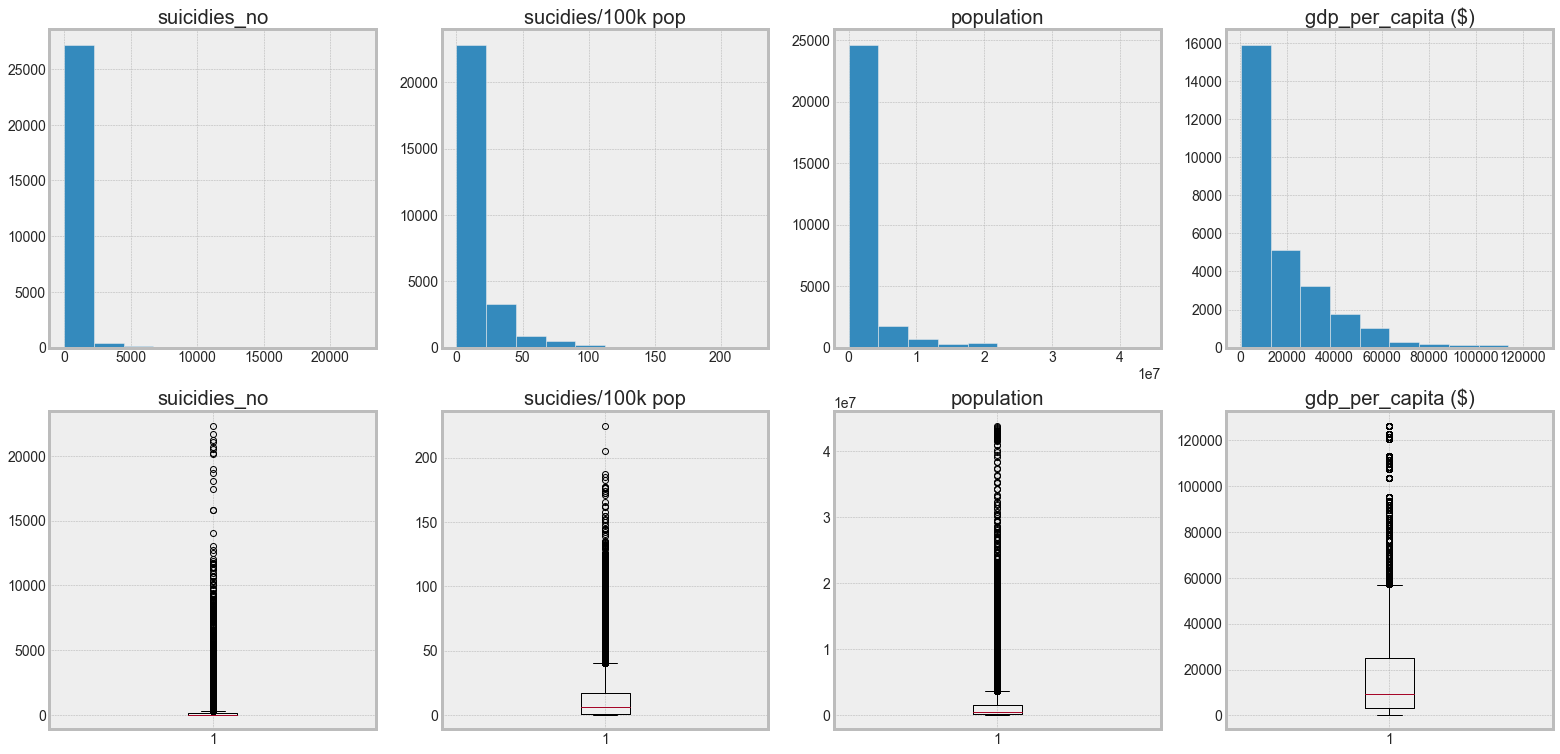

In [40]:
sns.set_style('white')
plt.style.use('bmh')
plt.figure(figsize=(24, 12))

plt.subplot(2, 4, 1)
plt.hist(df['suicides_no'])
plt.title('suicidies_no')

plt.subplot(2, 4, 2)
plt.hist(df['suicides/100k pop'])
plt.title('sucidies/100k pop')

plt.subplot(2, 4, 3)
plt.hist(df['population'])
plt.title('population')

plt.subplot(2, 4, 4)
plt.hist(df['gdp_per_capita ($)'])
plt.title('gdp_per_capita ($)')

plt.subplot(2, 4, 5)
plt.boxplot(df['suicides_no'])
plt.title('suicidies_no')

plt.subplot(2, 4, 6)
plt.boxplot(df['suicides/100k pop'])
plt.title('sucidies/100k pop')

plt.subplot(2, 4, 7)
plt.boxplot(df['population'])
plt.title('population')

plt.subplot(2, 4, 8)
plt.boxplot(df['gdp_per_capita ($)'])
plt.title('gdp_per_capita ($)')

plt.show()

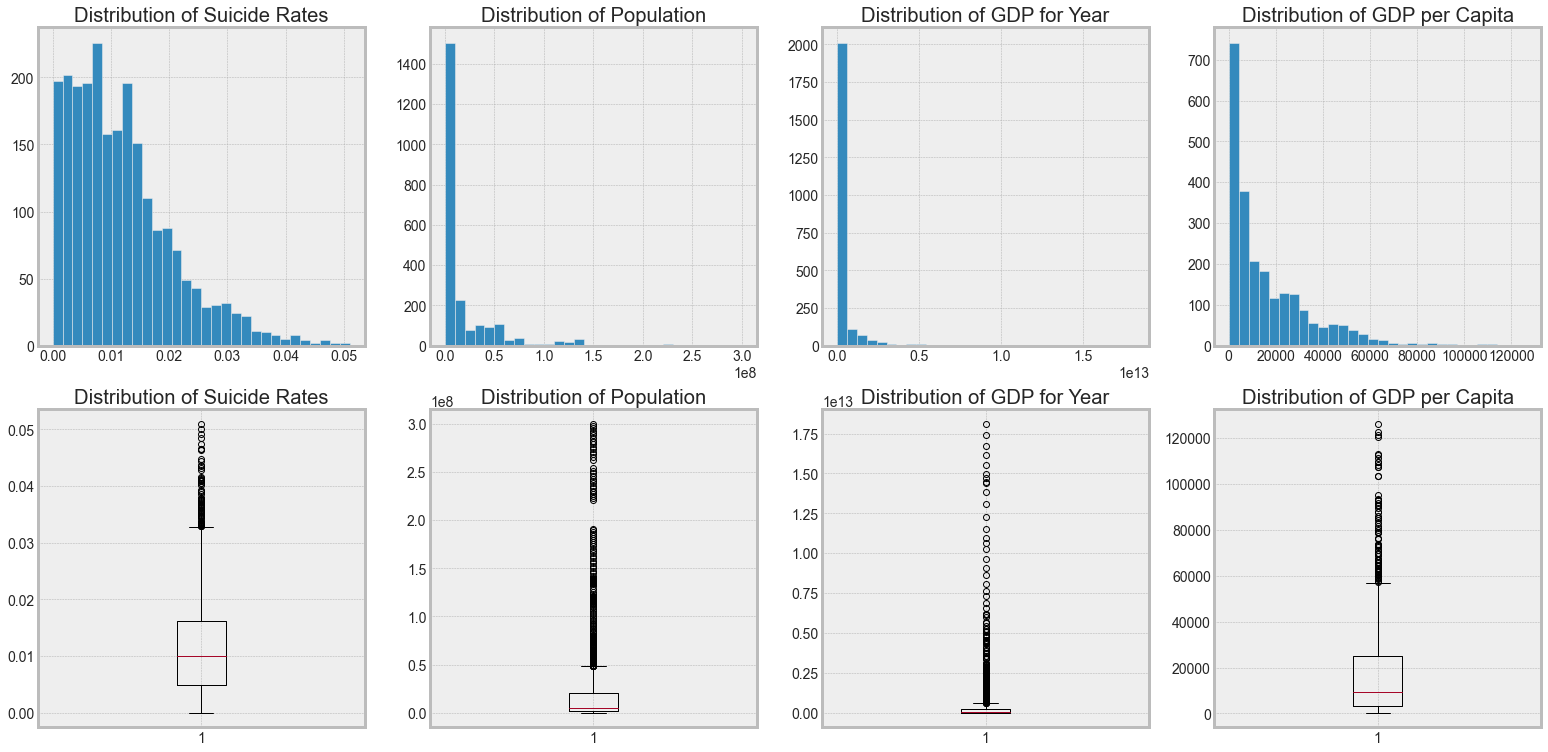

In [41]:
sns.set_style('white')
plt.style.use('bmh')
plt.figure(figsize=(24, 12))

plt.subplot(2, 4, 1)
plt.hist(df.groupby(['country', 'year'])['suicide_rates_total'].max(), bins=30)
plt.title('Distribution of Suicide Rates')

plt.subplot(2, 4, 2)
plt.hist(df.groupby(['country', 'year'])['population_total'].max(), bins=30)
plt.title('Distribution of Population')

plt.subplot(2, 4, 3)
plt.hist(df.groupby(['country', 'year'])['gdp_for_year ($)'].max(), bins=30)
plt.title('Distribution of GDP for Year')

plt.subplot(2, 4, 4)
plt.hist(df.groupby(['country', 'year'])['gdp_per_capita ($)'].max(), bins=30)
plt.title('Distribution of GDP per Capita')

plt.subplot(2, 4, 5)
plt.boxplot(df.groupby(['country', 'year'])['suicide_rates_total'].max())
plt.title('Distribution of Suicide Rates')

plt.subplot(2, 4, 6)
plt.boxplot(df.groupby(['country', 'year'])['population_total'].max())
plt.title('Distribution of Population')

plt.subplot(2, 4, 7)
plt.boxplot(df.groupby(['country', 'year'])['gdp_for_year ($)'].max())
plt.title('Distribution of GDP for Year')

plt.subplot(2, 4, 8)
plt.boxplot(df.groupby(['country', 'year'])['gdp_per_capita ($)'].max())
plt.title('Distribution of GDP per Capita')

plt.show()

As you can see from the graphs, most of these data are **_right-skewed_**. Also, **Suicide Rates** do not have much outliers, as opposed to **Population** and **GDP per Capita** data.

## Countries

In [42]:
countries = df['country'].unique()

print("Countries in the dataset are:")
print(*countries, sep=', ', end='.')

Countries in the dataset are:
Albania, Antigua and Barbuda, Argentina, Armenia, Aruba, Australia, Austria, Azerbaijan, Bahamas, Bahrain, Barbados, Belarus, Belgium, Belize, Bosnia and Herzegovina, Brazil, Bulgaria, Cabo Verde, Canada, Chile, Colombia, Costa Rica, Croatia, Cuba, Cyprus, Czech Republic, Denmark, Dominica, Ecuador, El Salvador, Estonia, Fiji, Finland, France, Georgia, Germany, Greece, Grenada, Guatemala, Guyana, Hungary, Iceland, Ireland, Israel, Italy, Jamaica, Japan, Kazakhstan, Kiribati, Kuwait, Kyrgyzstan, Latvia, Lithuania, Luxembourg, Macau, Maldives, Malta, Mauritius, Mexico, Mongolia, Montenegro, Netherlands, New Zealand, Nicaragua, Norway, Oman, Panama, Paraguay, Philippines, Poland, Portugal, Puerto Rico, Qatar, Republic of Korea, Romania, Russian Federation, Saint Kitts and Nevis, Saint Lucia, Saint Vincent and Grenadines, San Marino, Serbia, Seychelles, Singapore, Slovakia, Slovenia, South Africa, Spain, Sri Lanka, Suriname, Sweden, Switzerland, Thailand, Trin

In [43]:
print('Countries sorted by suicide counts:')
display(pd.DataFrame(df.groupby(['country'])['suicides_no'].sum().sort_values(ascending=False)).reset_index().head(25))

Countries sorted by suicide counts:


country  suicides_no
0   Russian Federation      1209742
1        United States      1034013
2                Japan       806902
3               France       329127
4              Ukraine       319950
5              Germany       291262
6    Republic of Korea       261730
7               Brazil       226613
8               Poland       139098
9       United Kingdom       136805
10               Italy       132060
11              Mexico       111139
12            Thailand       110643
13              Canada       107561
14          Kazakhstan       101546
15               Spain       100202
16           Argentina        82219
17             Hungary        73891
18             Romania        72777
19           Australia        70111
20             Belgium        62761
21             Belarus        59892
22           Sri Lanka        55641
23            Colombia        53080
24         Netherlands        50833

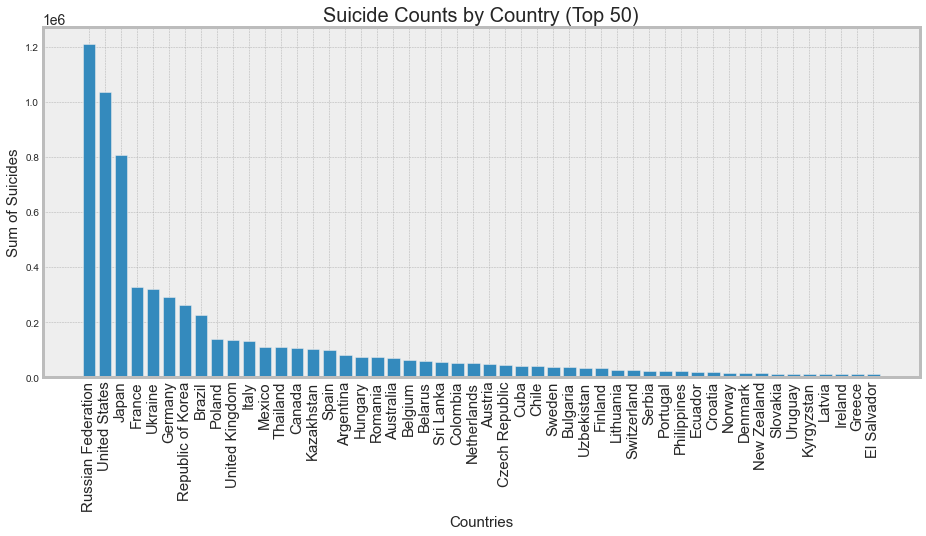

In [44]:
plt.figure(figsize=(14, 6))

plt.bar(df.groupby('country')['suicides_no'].sum().sort_values(ascending=False).index[:50],
        df.groupby('country')['suicides_no'].sum().sort_values(ascending=False).values[:50])
plt.title('Suicide Counts by Country (Top 50)', fontsize=20)
plt.xlabel('Countries', fontsize=15)
plt.ylabel('Sum of Suicides', fontsize=15)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=10)

plt.show()

In [45]:
print('Top 25 Counries according to Suicide Rates (suicide_no/population):')
display(pd.DataFrame(df.groupby('country')['suicide_rates_total'].max().sort_values(ascending=False).head(25)).reset_index())

Top 25 Counries according to Suicide Rates (suicide_no/population):


country  suicide_rates_total
0            Lithuania             0.051020
1   Russian Federation             0.044354
2              Estonia             0.043784
3               Latvia             0.043121
4              Hungary             0.041005
5            Sri Lanka             0.040904
6              Belarus             0.037450
7    Republic of Korea             0.033278
8           Kazakhstan             0.032945
9             Slovenia             0.032548
10             Finland             0.032342
11            Suriname             0.031627
12             Ukraine             0.031469
13              Guyana             0.030708
14             Austria             0.030046
15               Japan             0.026480
16             Belgium             0.024607
17             Croatia             0.024338
18              France             0.024329
19                Cuba             0.023730
20             Uruguay             0.022021
21              Serbia             0.021933
22         Switzerland             0.021527
23          Montenegro             0.021358
24          Luxembourg             0.021218

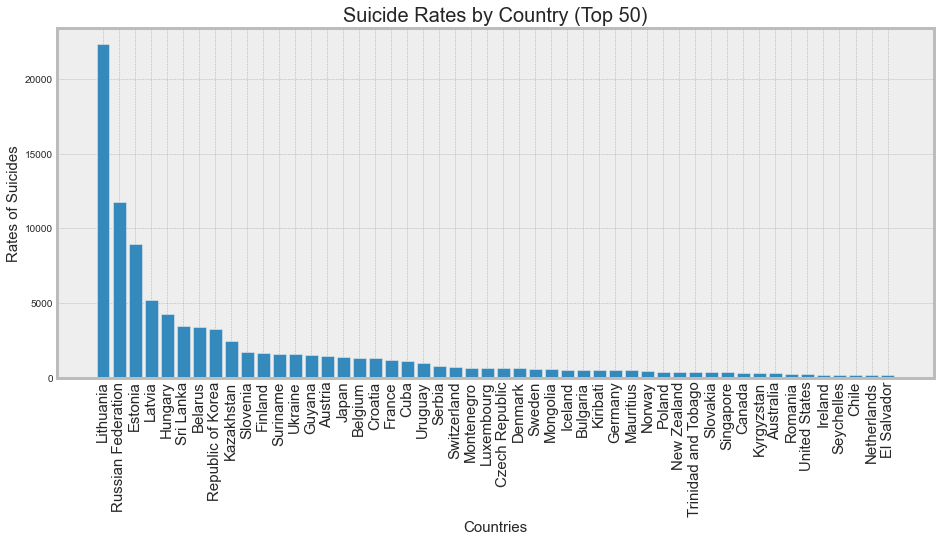

In [46]:
plt.figure(figsize=(14, 6))

plt.bar(df.groupby('country')['suicide_rates_total'].max().sort_values(ascending=False).index[:50],
        df.groupby('country')['suicides_no'].max().sort_values(ascending=False).values[:50])
plt.title('Suicide Rates by Country (Top 50)', fontsize=20)
plt.xlabel('Countries', fontsize=15)
plt.ylabel('Rates of Suicides', fontsize=15)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=10)

plt.show()

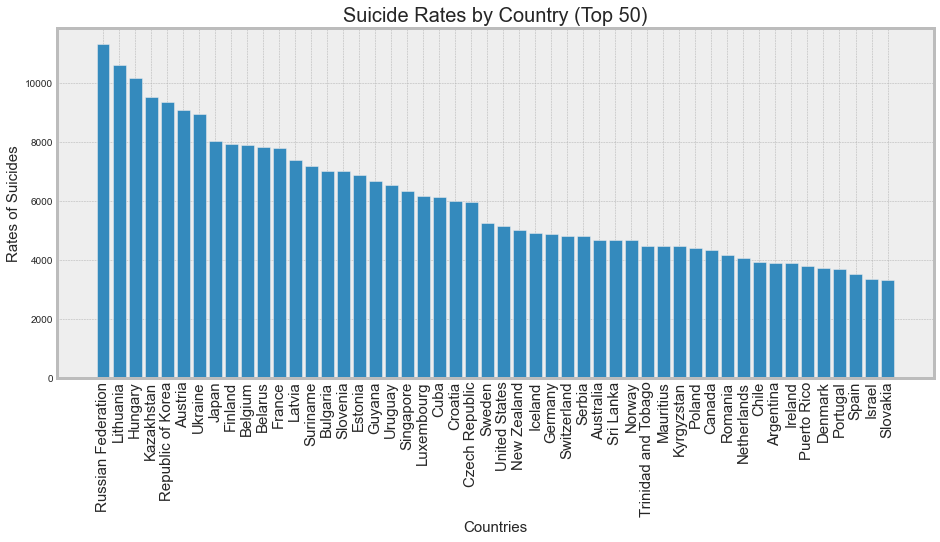

In [47]:
plt.figure(figsize=(14, 6))

plt.bar(df.groupby('country')['suicides/100k pop'].sum().sort_values(ascending=False).index[:50],
        df.groupby('country')['suicides/100k pop'].sum().sort_values(ascending=False).values[:50])
plt.title('Suicide Rates by Country (Top 50)', fontsize=20)
plt.xlabel('Countries', fontsize=15)
plt.ylabel('Rates of Suicides', fontsize=15)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=10)

plt.show()

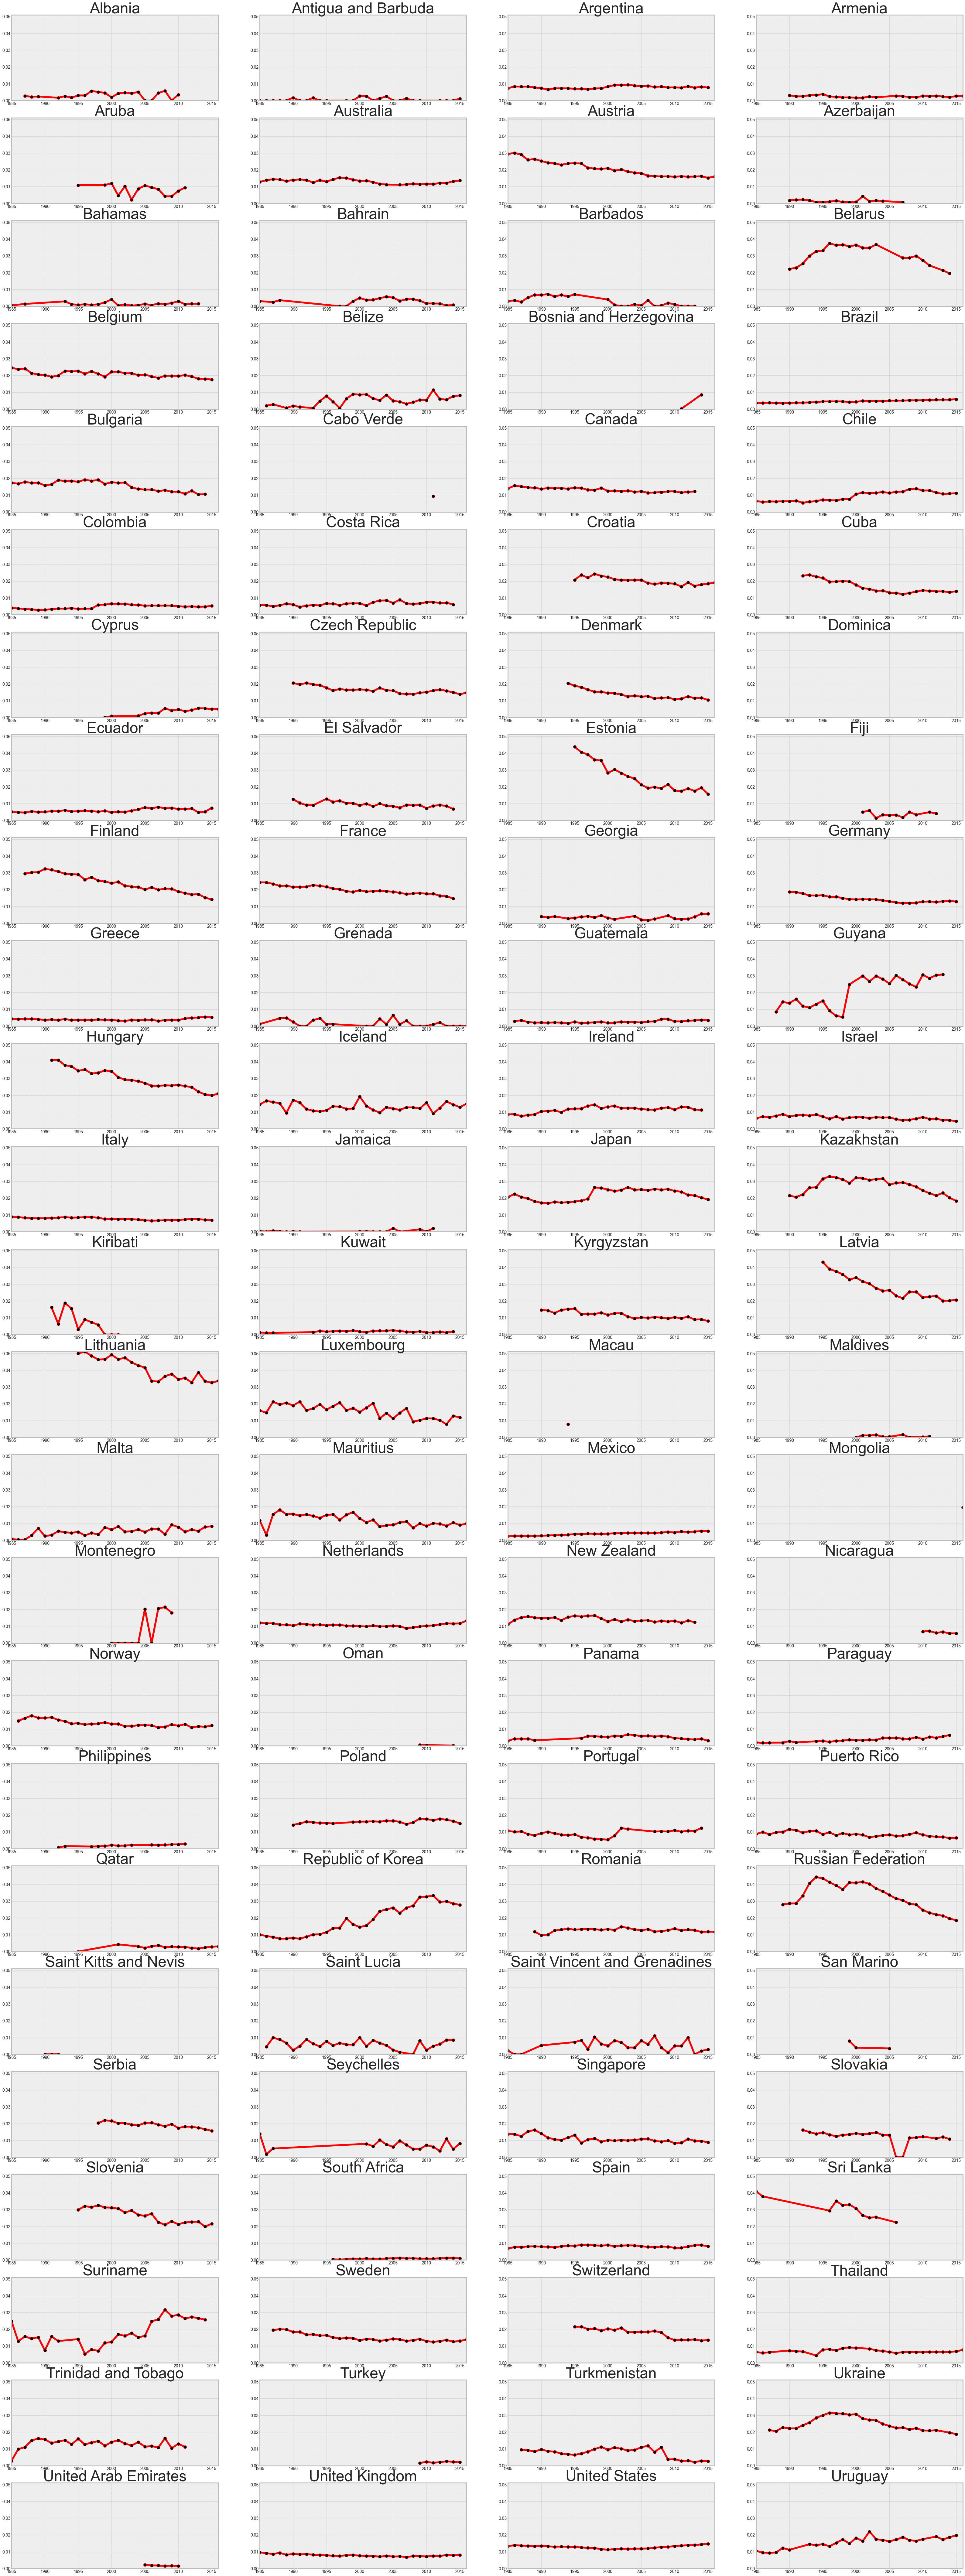

In [48]:
plt.figure(figsize=(50, 150))

for i in range(len(df['country'].unique())-1):
    plt.subplot(26, 4, i+1)
    plt.plot(df.groupby(['country', 'year'])['suicide_rates_total'].max()[df['country'].unique()[i]],
             lw=6, color='r', marker='o', ms=10, mfc='k')
    plt.title(str(df['country'].unique()[i]), fontsize=50)
    plt.xlim(1985, 2016)
    plt.ylim(0, 0.051020)
    
plt.show()

### Year

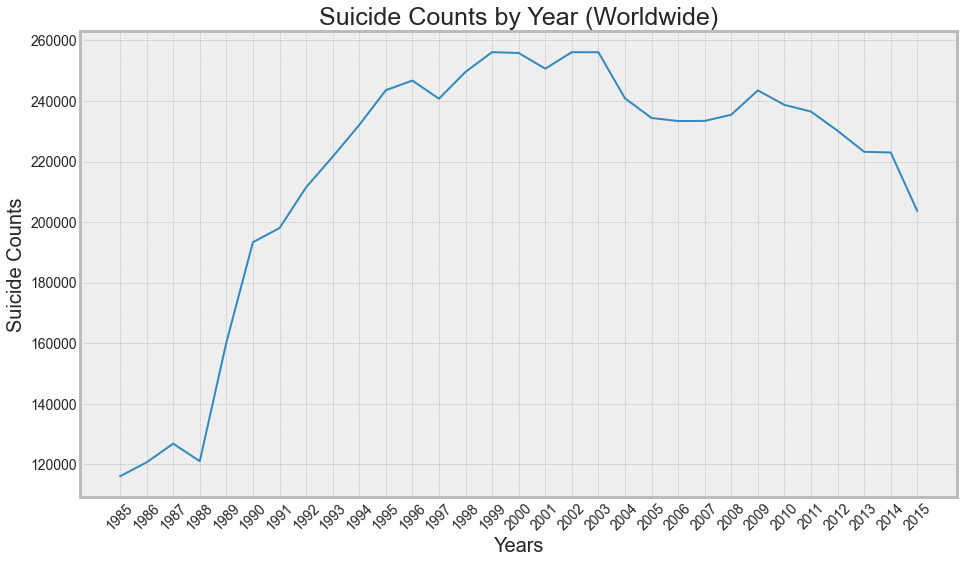

In [49]:
plt.figure(figsize=(14, 8))

plt.plot(df.groupby('year')['suicides_no'].sum()[:-1])
plt.title('Suicide Counts by Year (Worldwide)', fontsize=25)
plt.xlabel('Years', fontsize=20)
plt.ylabel('Suicide Counts', fontsize=20)
plt.xticks(range(1985, 2016), rotation=45)

plt.show()

- From **1988** to **1990**, suicide rates increase from 120.000s to nearly 200.000s.
- From **1990** to **1996**, the increases continues until 250.000s.

### Gender

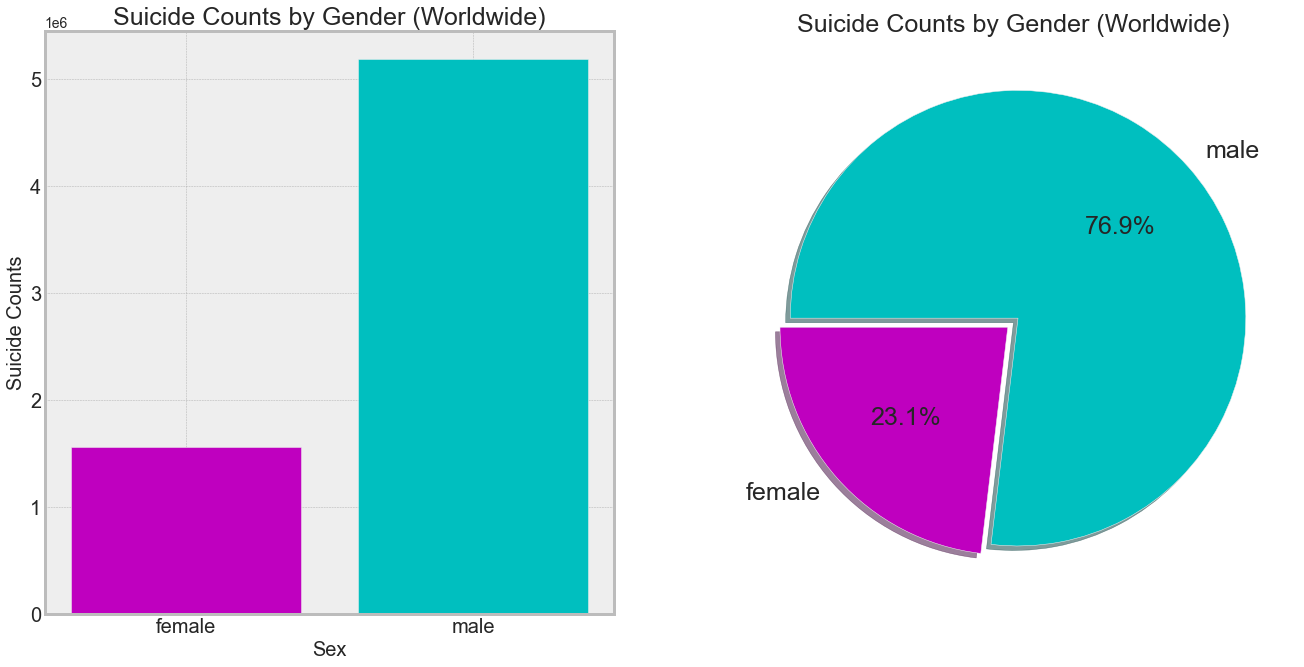

In [50]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.bar(df.groupby('sex')['suicides_no'].sum().index,
        df.groupby('sex')['suicides_no'].sum().values, color=['m', 'c'])
plt.title('Suicide Counts by Gender (Worldwide)', fontsize=25)
plt.xlabel('Sex', fontsize=20)
plt.ylabel('Suicide Counts', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.subplot(1, 2, 2)
plt.pie(df.groupby('sex')['suicides_no'].sum(), labels=['female', 'male'], explode=(0.03, 0.03),
        autopct='%1.1f%%', shadow=True, colors=['m', 'c'], textprops={'fontsize':25}, startangle=180)
plt.title('Suicide Counts by Gender (Worldwide)', fontsize=25)

plt.show()

### Gender by Countries

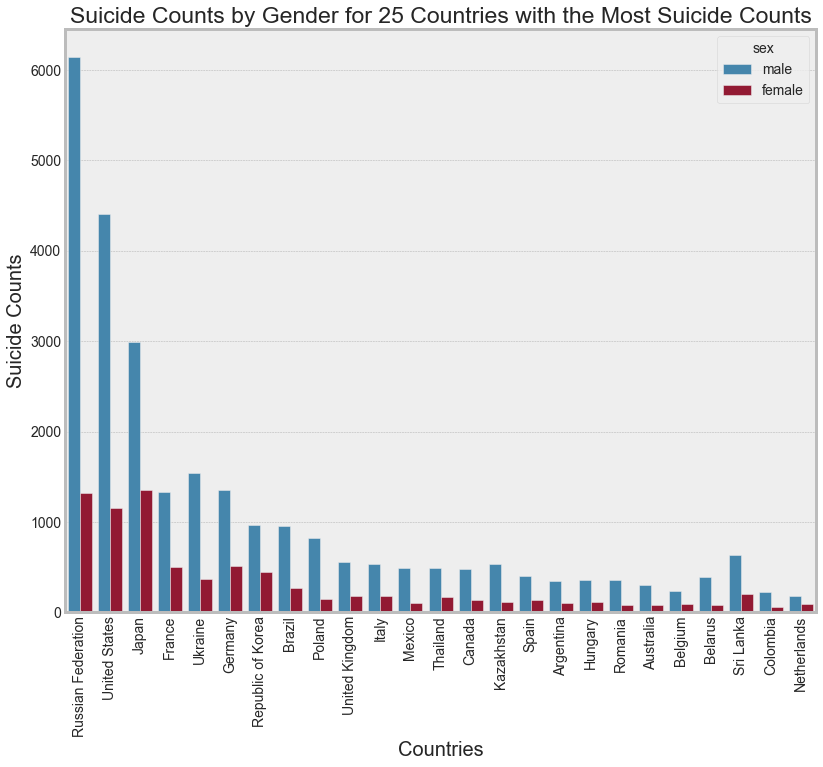

In [51]:
top25_countries = df.groupby(['country'])['suicides_no'].sum().sort_values(ascending=False)[:25].index

plt.figure(figsize=(12, 10))

sns.barplot(x='country', y='suicides_no', hue='sex',
            data=df[df['country'].isin(top25_countries)],
            ci=None, order=top25_countries)
plt.title('Suicide Counts by Gender for 25 Countries with the Most Suicide Counts', fontsize=23)
plt.xlabel('Countries', fontsize=20)
plt.ylabel('Suicide Counts', fontsize=20)
plt.xticks(rotation=90)

plt.show()

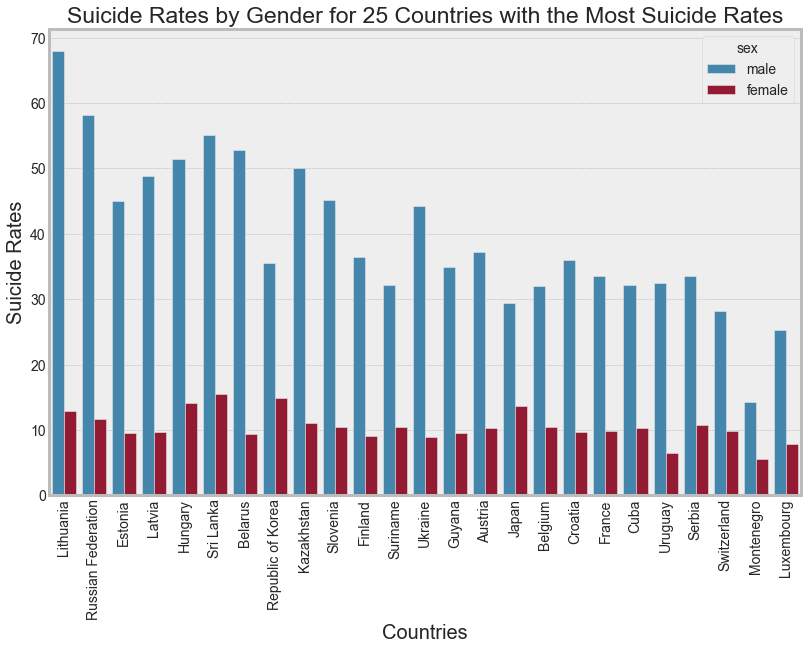

In [52]:
top25_countries_r = df.groupby('country')['suicide_rates_total'].max().sort_values(ascending=False)[:25].index

plt.figure(figsize=(12, 8))

sns.barplot(x='country', y='suicides/100k pop', hue='sex',
            data=df[df['country'].isin(top25_countries_r)],
            ci=None, order=top25_countries_r)
plt.title('Suicide Rates by Gender for 25 Countries with the Most Suicide Rates', fontsize=23)
plt.xlabel('Countries', fontsize=20)
plt.ylabel('Suicide Rates', fontsize=20)
plt.xticks(rotation=90)

plt.show()

### Generation & Age Columns

In [53]:
list(df.groupby(['generation', 'age'])['generation'].count().index)

[('Boomers', '25-34 years'),
 ('Boomers', '35-54 years'),
 ('Boomers', '55-74 years'),
 ('G.I. Generation', '55-74 years'),
 ('G.I. Generation', '75+ years'),
 ('Generation X', '15-24 years'),
 ('Generation X', '25-34 years'),
 ('Generation X', '35-54 years'),
 ('Generation X', '5-14 years'),
 ('Generation Z', '5-14 years'),
 ('Millenials', '15-24 years'),
 ('Millenials', '25-34 years'),
 ('Millenials', '5-14 years'),
 ('Silent', '35-54 years'),
 ('Silent', '55-74 years'),
 ('Silent', '75+ years')]

This shows that some age groups are included in more than one generation. For instance, '25-34 years' age group can be from 'Boomer' generation, 'Generation X', or 'Millenials'. Therefore, I will do separate analyses on these columns.

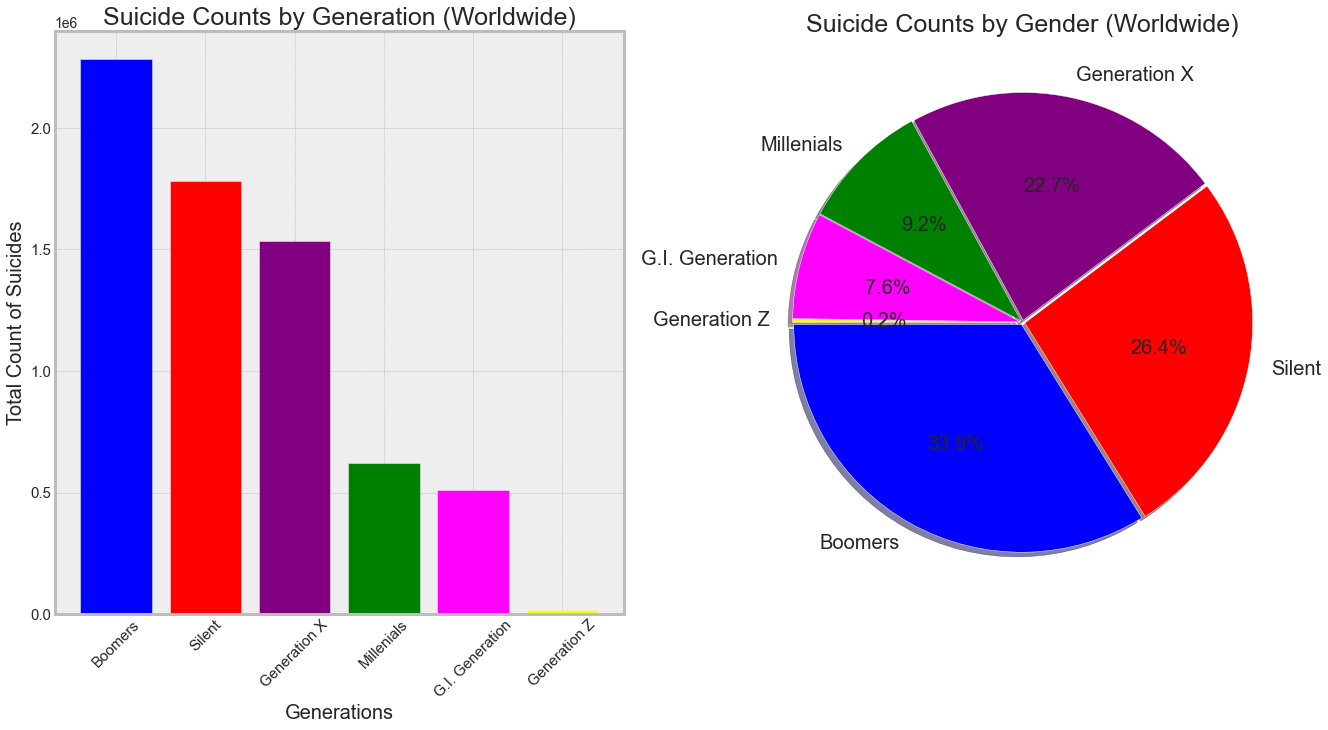

In [54]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.bar(df.groupby('generation')['suicides_no'].sum().sort_values(ascending=False).index,
        df.groupby('generation')['suicides_no'].sum().sort_values(ascending=False).values,
        color=['blue', 'red', 'purple', 'green', 'magenta', 'yellow'])
plt.title('Suicide Counts by Generation (Worldwide)', fontsize=25)
plt.xlabel('Generations', fontsize=20)
plt.ylabel('Total Count of Suicides', fontsize=20)
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=15)

plt.subplot(1, 2, 2)
plt.pie(df.groupby('generation')['suicides_no'].sum().sort_values(ascending=False),
        labels=df.groupby('generation')['suicides_no'].sum().sort_values(ascending=False).index,
        explode=[0.01]*6, autopct='%1.1f%%', shadow=True, textprops={'fontsize':20}, startangle=180,
        colors=['blue', 'red', 'purple', 'green', 'magenta', 'yellow'])
plt.title('Suicide Counts by Gender (Worldwide)', fontsize=25)

plt.show()

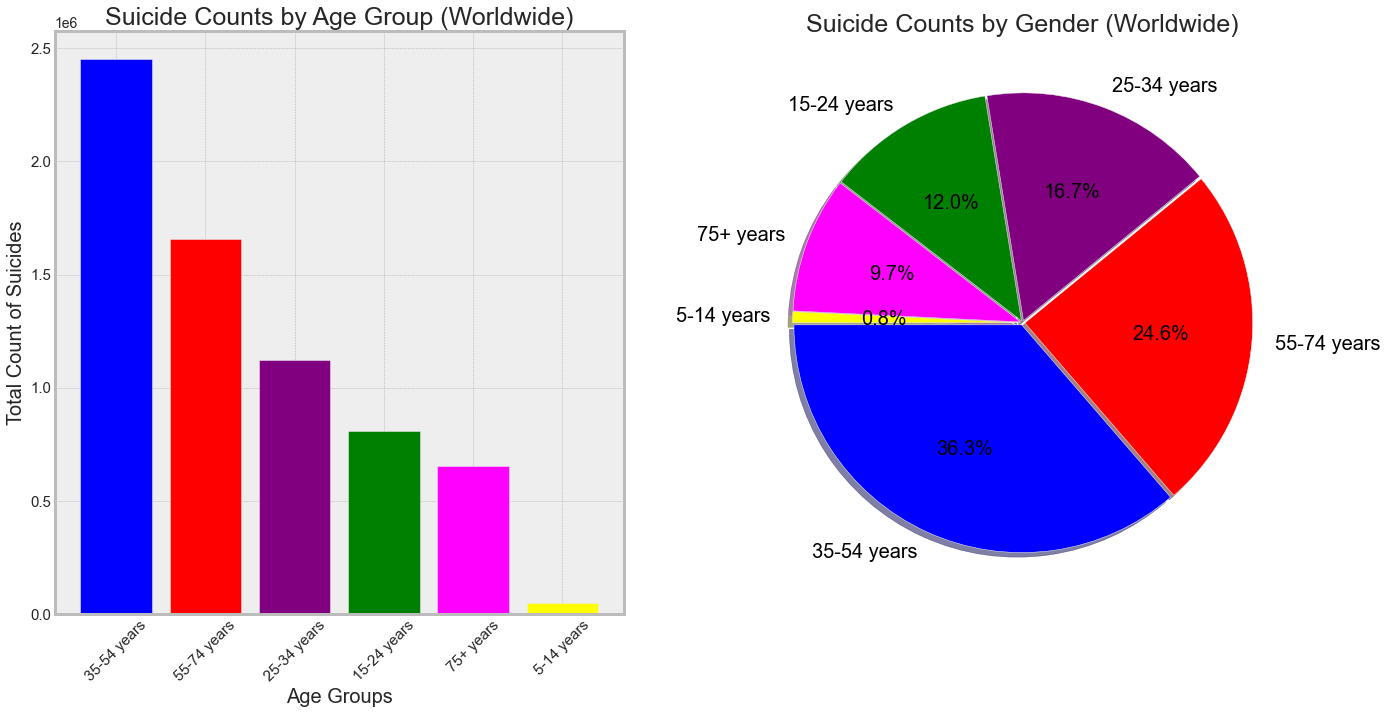

In [55]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.bar(df.groupby('age')['suicides_no'].sum().sort_values(ascending=False).index,
        df.groupby('age')['suicides_no'].sum().sort_values(ascending=False).values,
        color=['blue', 'red', 'purple', 'green', 'magenta', 'yellow'])
plt.title('Suicide Counts by Age Group (Worldwide)', fontsize=25)
plt.xlabel('Age Groups', fontsize=20)
plt.ylabel('Total Count of Suicides', fontsize=20)
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=15)

plt.subplot(1, 2, 2)
plt.pie(df.groupby('age')['suicides_no'].sum().sort_values(ascending=False),
        labels=df.groupby('age')['suicides_no'].sum().sort_values(ascending=False).index,
        explode=[0.01]*6, autopct='%1.1f%%', shadow=True, textprops={'fontsize':20, 'color':'k'}, startangle=180,
        colors=['blue', 'red', 'purple', 'green', 'magenta', 'yellow'])
plt.title('Suicide Counts by Gender (Worldwide)', fontsize=25)

plt.show()

Now, I will create a lineplot of each age group across different years. When I first did this, I saw that each line was going strictly down at the year 2016, which means that the values on 2016 was considerably smaller than the earlier years (probably because they were not yet complete). So, I have filtered out the year 2016 from this plot.

In [56]:
year_age_df = pd.DataFrame(df.groupby(['year', 'age'])['suicides_no'].sum()).reset_index()
year_age_df = year_age_df[year_age_df['year'] != 2016]

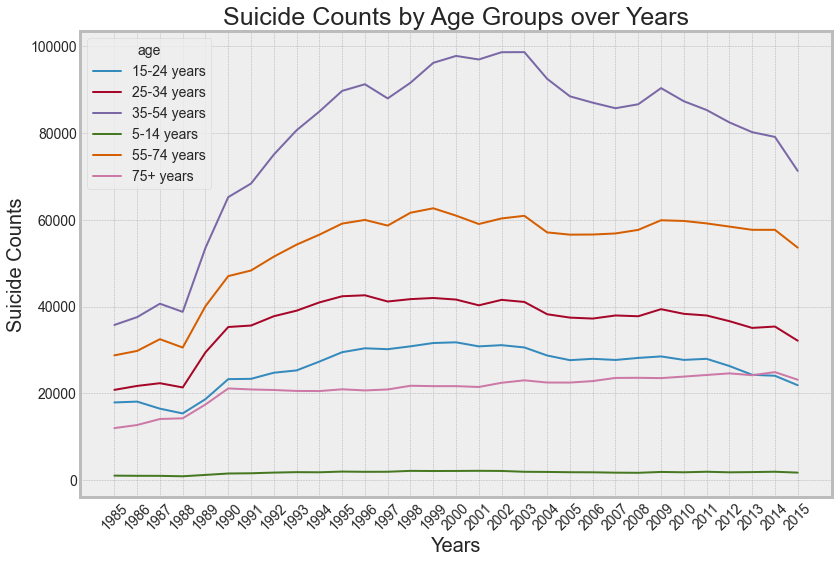

In [57]:
plt.figure(figsize=(12,8))

sns.lineplot(x='year', y='suicides_no', hue='age', data=year_age_df)
plt.title('Suicide Counts by Age Groups over Years', fontsize=25)
plt.xlabel('Years', fontsize=20)
plt.ylabel('Suicide Counts', fontsize=20)
plt.xticks(range(1985, 2016), rotation=45)

plt.show()

In [58]:
year_generation_df = pd.DataFrame(df.groupby(['year', 'generation'])['suicides_no'].sum()).reset_index()
year_generation_df = year_generation_df[year_generation_df['year'] != 2016]

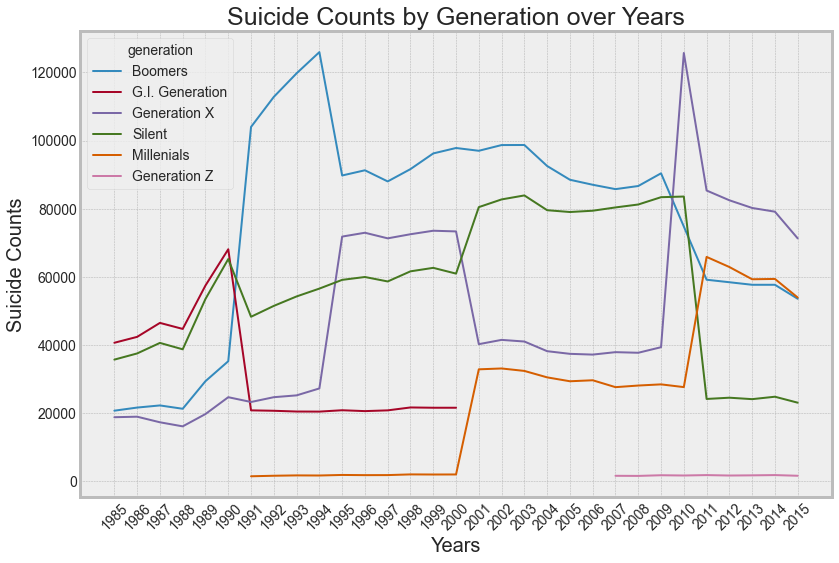

In [59]:
plt.figure(figsize=(12,8))

sns.lineplot(x='year', y='suicides_no', hue='generation', data=year_generation_df)
plt.title('Suicide Counts by Generation over Years', fontsize=25)
plt.xlabel('Years', fontsize=20)
plt.ylabel('Suicide Counts', fontsize=20)
plt.xticks(range(1985, 2016), rotation=45)

plt.show()

Looking at this data in terms of generation also allows us to see the years that each generation has lived. For instance, you will notice that data on **G.I. Generation** stops around the year _2000_, while the data of **Generation Z** starts around year _2007_.

### Suicide Counts and Rates of Countries by Year

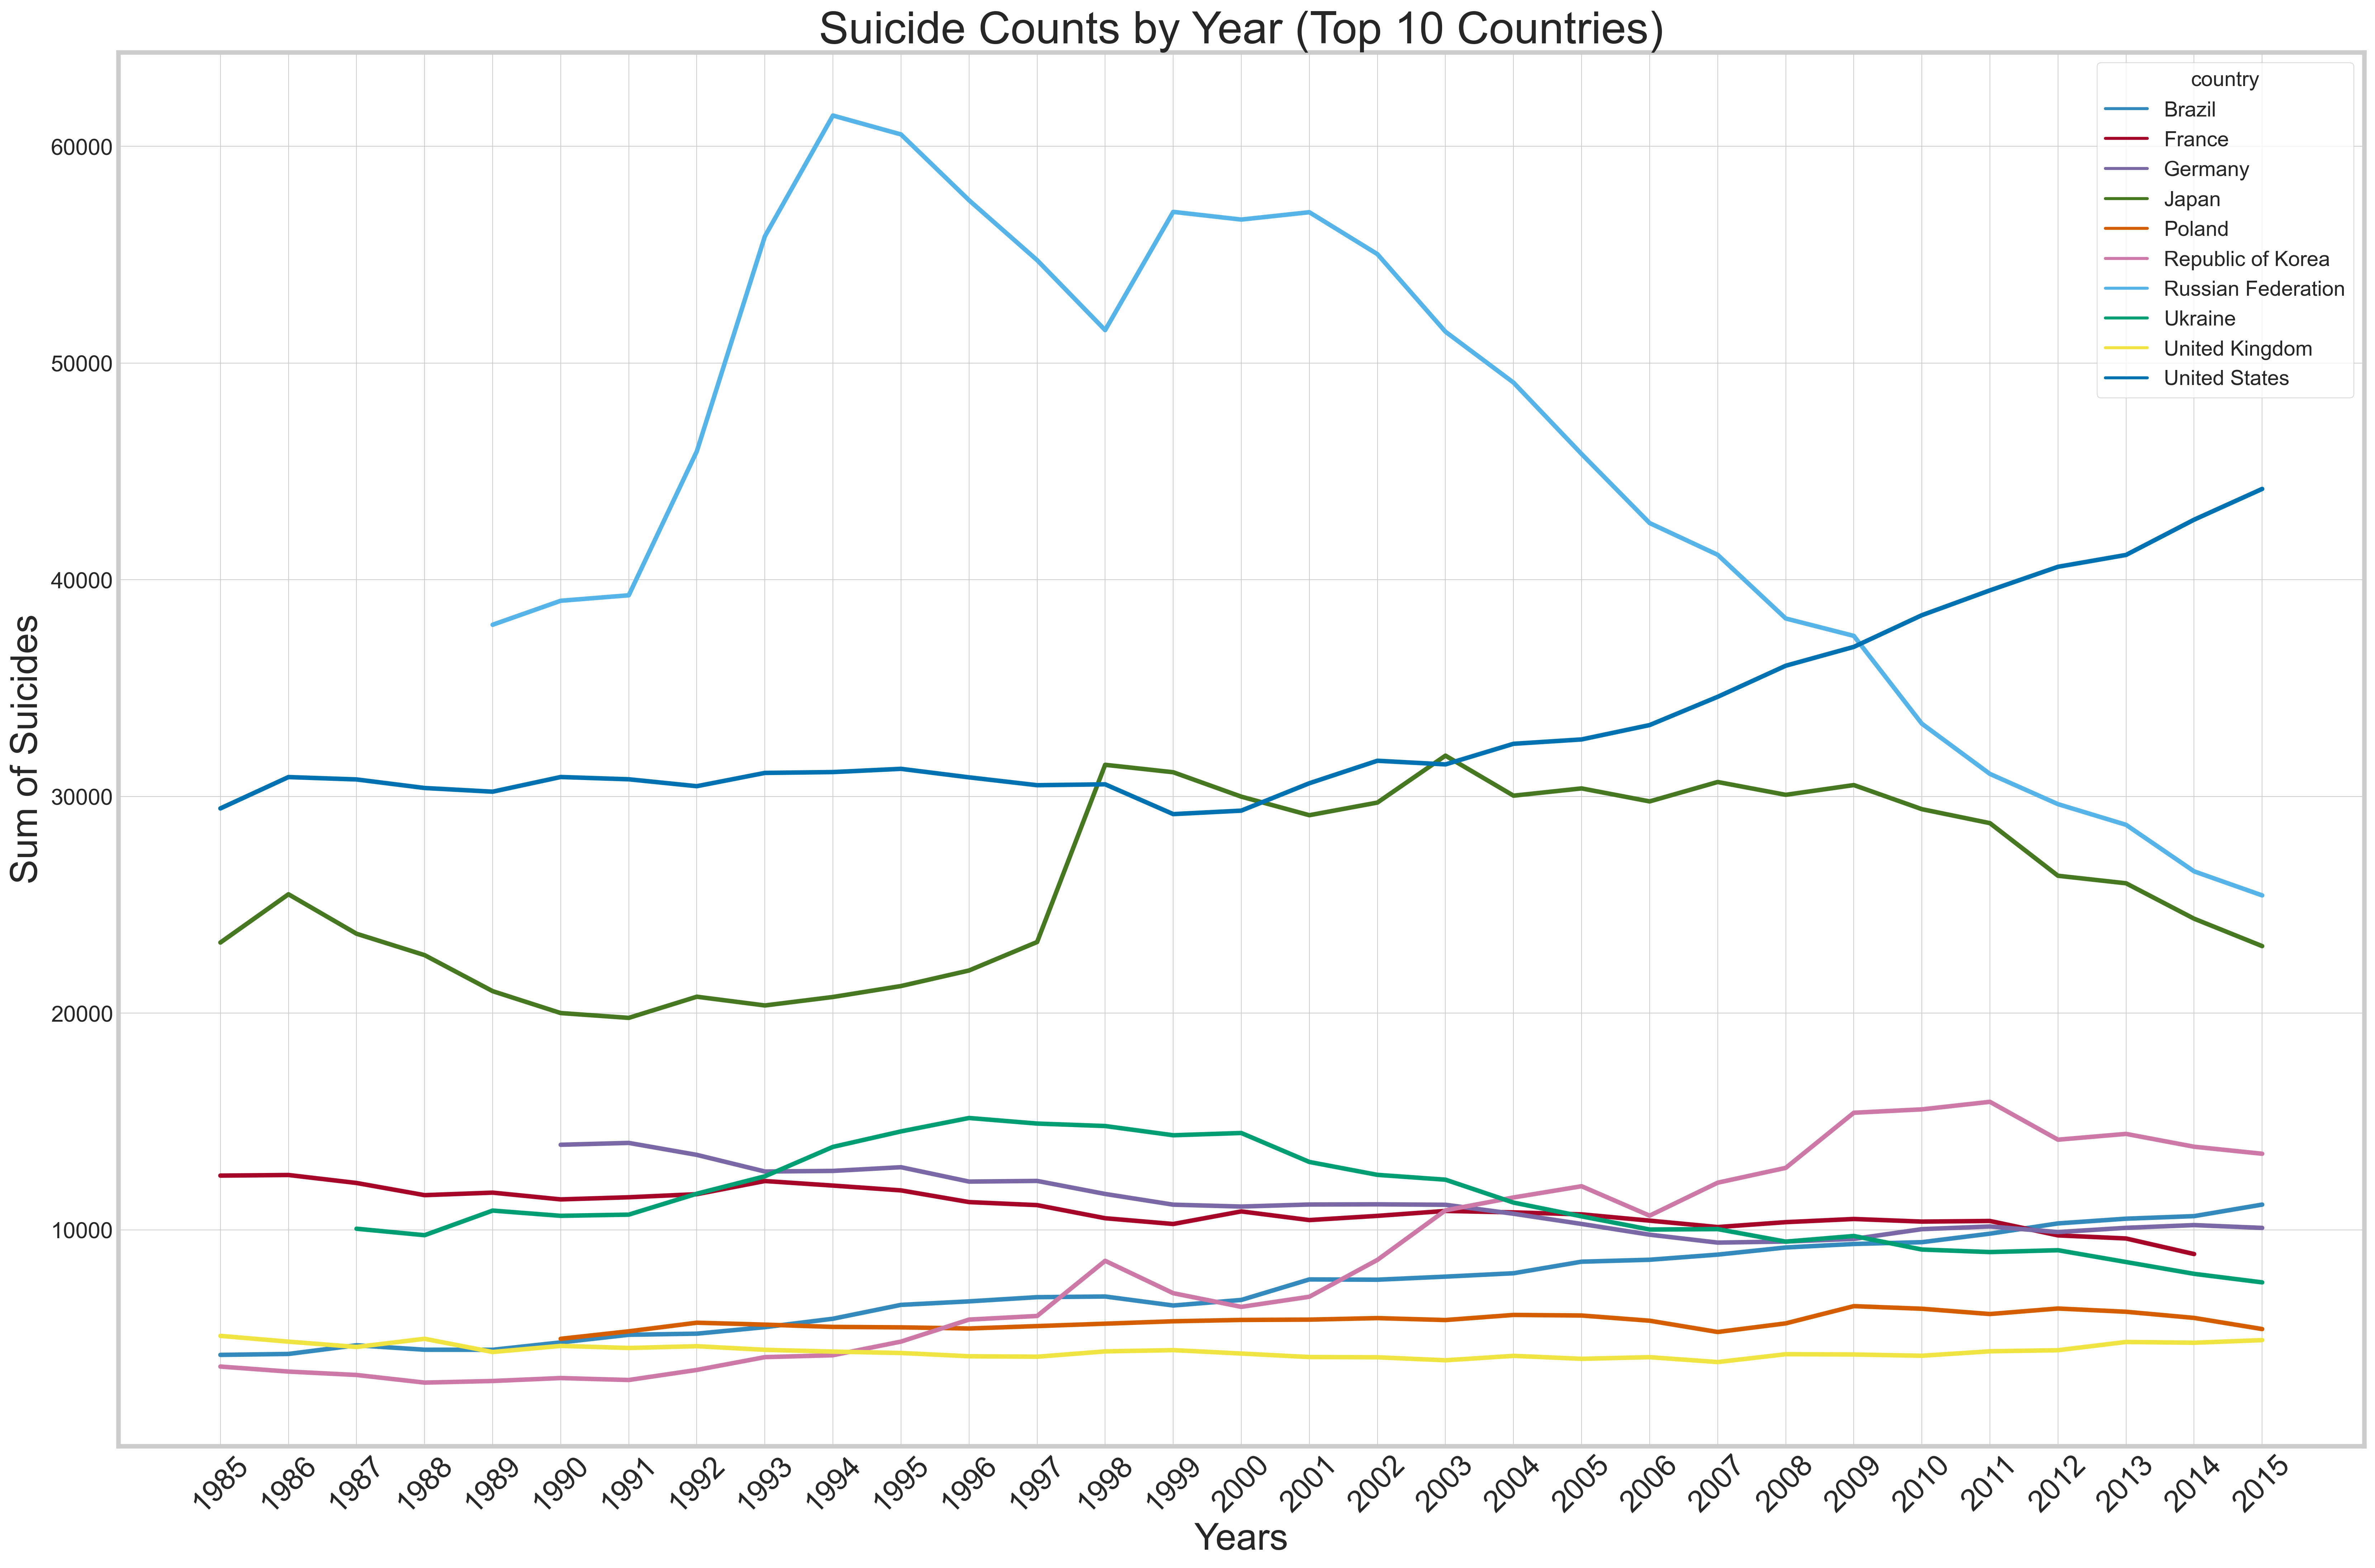

In [60]:
country_year_group = pd.DataFrame(df.groupby(['country', 'year'])['suicides_no'].sum()).reset_index()
country_year_group = pd.concat([country_year_group, pd.Series(df.groupby(['country', 'year'])['suicide_rates_total'].max().values, name='suicide_rates_total')], axis=1)

sns.set_style('whitegrid')

plt.figure(figsize=(24, 16), dpi=300)

sns.lineplot(x='year', y='suicides_no', hue='country', linewidth=3,
             data=country_year_group[country_year_group['country'].isin(top25_countries[:10])])

plt.title('Suicide Counts by Year (Top 10 Countries)', fontsize=30)
plt.xlabel('Years', fontsize=25)
plt.ylabel('Sum of Suicides', fontsize=25)
plt.xticks(range(1985, 2016), fontsize=20, rotation=45)
plt.yticks(fontsize=15)

plt.show()

- For **Russian Federation**, we see that from **1991 to 1994**, there is a _significant increase_ in the suicide numbers. These years correspond to the aftermath of the **Collapse of Soviet Union** which were politically unstable years in the Russia.

- For **Japan**, there is an _increase_ in suicide numbers from **1997 to 1998**. In 1997, there was an **Asian Financial Crisis** which affected Japan severely.

- For the **United States**, we see a _steady increase_ from 2000 onwards.

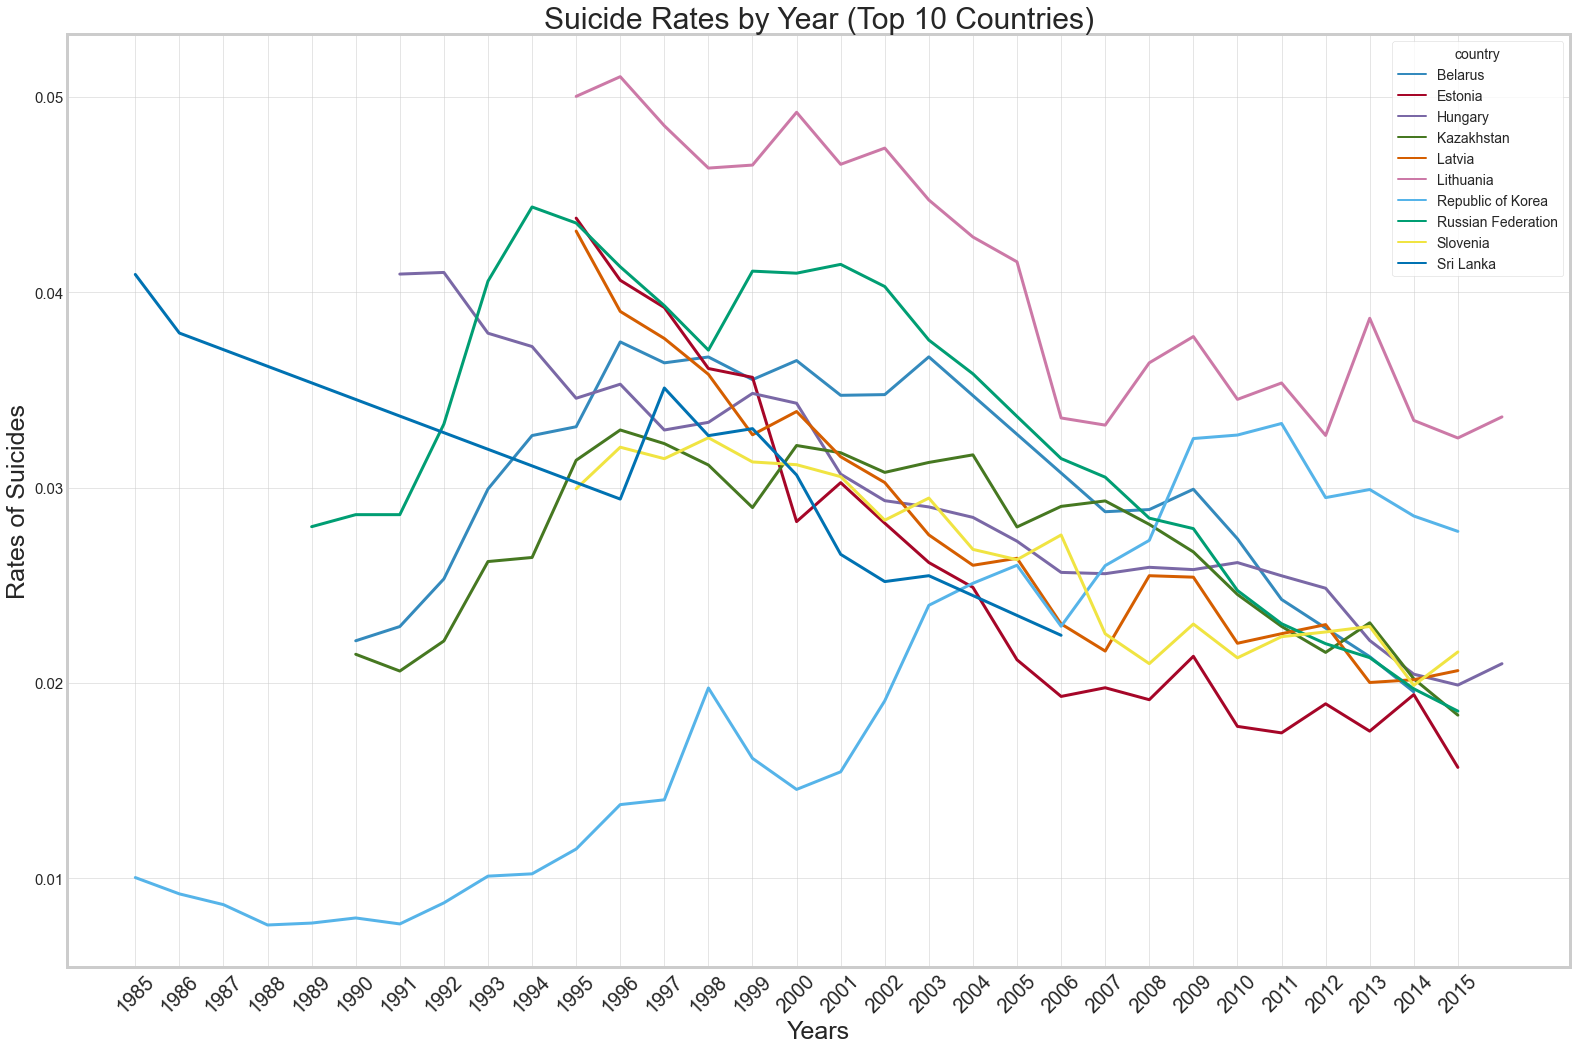

In [61]:
sns.set_style('whitegrid')

plt.figure(figsize=(24, 16))

sns.lineplot(x='year', y='suicide_rates_total', hue='country', linewidth = 3,
             data=country_year_group[country_year_group['country'].isin(top25_countries_r[:10])])

plt.title('Suicide Rates by Year (Top 10 Countries)', fontsize=30)
plt.xlabel('Years', fontsize=25)
plt.ylabel('Rates of Suicides', fontsize=25)
plt.xticks(range(1985, 2016), fontsize=20, rotation=45)
plt.yticks(fontsize=15)

plt.show()

In terms of the suicide rates (i.e., total suicide/total population) is examined, we observe:

- A _dramatic increase_ in suicide rates in **Republic of Korea** after **1991**.
- For the **rest of the countries**, on the other hand, there is a _steady decrease_ in the suicide rates especially after **2000s**.

### HDI (Human Development Index)

In [62]:
print("Top 25 countries according to their HDI (Human Development Index):")
display(pd.DataFrame(df.groupby('country')['HDI'].mean().sort_values(ascending=False)[:25]))

Top 25 countries according to their HDI (Human Development Index):


HDI
country                 
Switzerland     0.911952
Dominica        0.907623
Australia       0.897769
United States   0.895677
Denmark         0.894455
Norway          0.890867
Germany         0.885846
Sweden          0.881542
Netherlands     0.879534
New Zealand     0.878931
Belgium         0.871242
Iceland         0.868576
Israel          0.865081
Austria         0.862796
United Kingdom  0.862016
Ireland         0.861700
Finland         0.860690
Slovenia        0.857905
Luxembourg      0.857161
Canada          0.855293
France          0.852433
Czech Republic  0.852000
Japan           0.850371
Cyprus          0.847652
Italy           0.843742

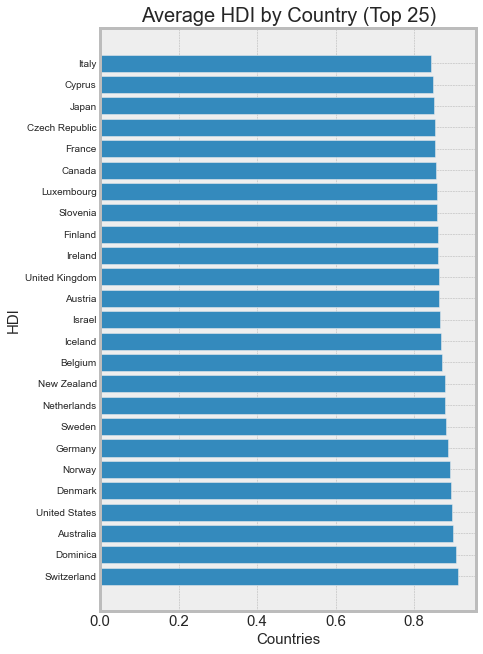

In [63]:
sns.set_style('white')
plt.style.use('bmh')

plt.figure(figsize=(6, 10))

plt.barh(y=df.groupby('country')['HDI'].mean().sort_values(ascending=False).index[:25],
         width=df.groupby('country')['HDI'].mean().sort_values(ascending=False)[:25])
plt.title('Average HDI by Country (Top 25)', fontsize=20)
plt.xlabel('Countries', fontsize=15)
plt.ylabel('HDI', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=10)

plt.show()

## Multivariate Analysis

### HDI & Suicide

In [64]:
hdi_suicide = pd.DataFrame(df.groupby(['country'])[['HDI', 'suicide_rates_total']].mean().reset_index())

In [65]:
hdi_suicide.corr()

HDI  suicide_rates_total
HDI                  1.000000             0.233263
suicide_rates_total  0.233263             1.000000

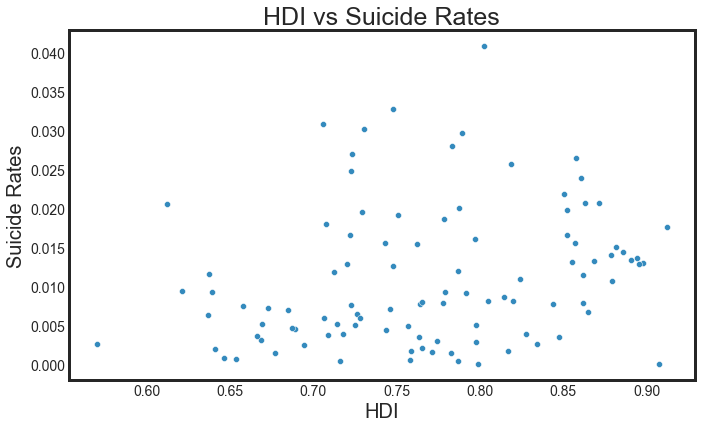

In [66]:
sns.set_style('white')
plt.figure(figsize=(10, 6))

sns.scatterplot(x='HDI', y='suicide_rates_total', data=hdi_suicide)
plt.title('HDI vs Suicide Rates', fontsize=25)
plt.xlabel('HDI', fontsize=20)
plt.ylabel('Suicide Rates', fontsize=20)

plt.show()

There doesn't seem to be a corelation between Human Development Index (HDI) and Suicide Rates.

### GDP & Suicide

In [67]:
country_year_gdp = pd.DataFrame(df.groupby(['country', 'year', 'gdp_for_year ($)'])['suicides_no'].sum()).reset_index()
country_year_gdp = pd.concat([country_year_gdp, pd.Series(df.groupby(['country', 'year'])['suicide_rates_total'].max().values, name='suicide_rates_total')], axis=1)

country_year_gdp.head()

country  year  gdp_for_year ($)  suicides_no  suicide_rates_total
0  Albania  1987        2156624900           73             0.002694
1  Albania  1988        2126000000           63             0.002279
2  Albania  1989        2335124988           68             0.002426
3  Albania  1992         709452584           47             0.001665
4  Albania  1993        1228071038           73             0.002600

In [68]:
top25_gdp = country_year_gdp.groupby('country')['gdp_for_year ($)'].max().sort_values(ascending=False).index[:25]

Notice that for the following two scatter plots, I am limiting x and y-axes with .xlim() and .ylim(), since this way, our plot does not get affected by the outliers in Russian Federation and United States.

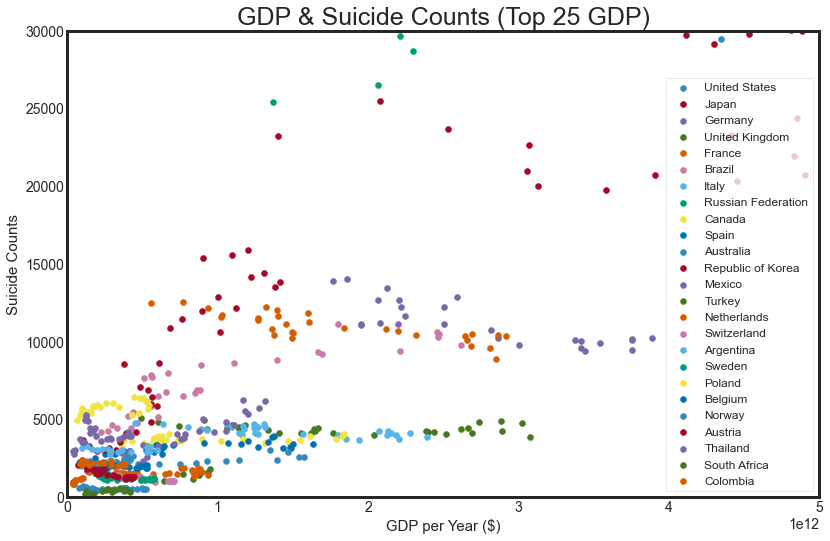

In [69]:
plt.figure(figsize=(12, 8))

for country in top25_gdp:
    plt.scatter(country_year_gdp[country_year_gdp['country'] == country]['gdp_for_year ($)'],
                country_year_gdp[country_year_gdp['country'] == country]['suicides_no'],
                label=country)

plt.title('GDP & Suicide Counts (Top 25 GDP)', fontsize=25)
plt.xlabel('GDP per Year ($)', fontsize=15)
plt.ylabel('Suicide Counts', fontsize=15)
plt.xlim(0, 5_000_000_000_000)
plt.ylim(0, 30000)

plt.legend(fontsize=12)
plt.show()

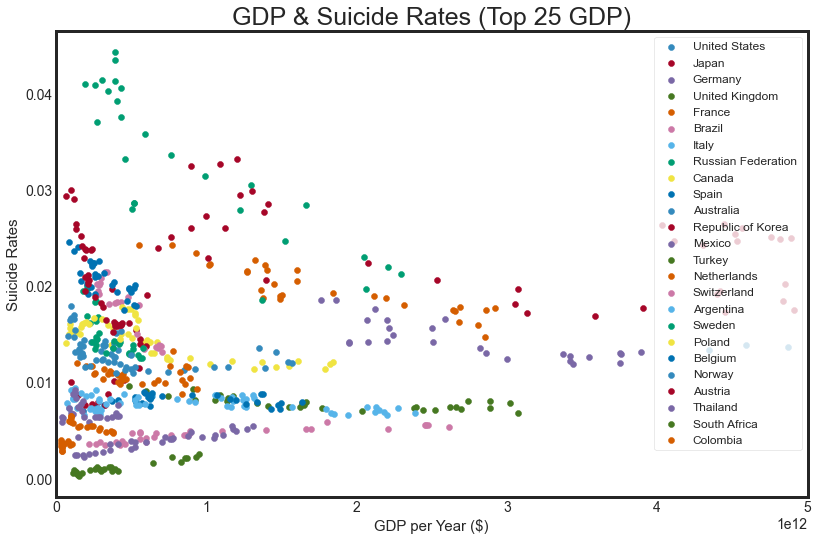

In [70]:
sns.set_style('white')
plt.figure(figsize=(12, 8))

for country in top25_gdp:
    plt.scatter(country_year_gdp[country_year_gdp['country'] == country]['gdp_for_year ($)'],
                country_year_gdp[country_year_gdp['country'] == country]['suicide_rates_total'],
                label=country)

plt.title('GDP & Suicide Rates (Top 25 GDP)', fontsize=25)
plt.xlabel('GDP per Year ($)', fontsize=15)
plt.ylabel('Suicide Rates', fontsize=15)
plt.xlim(0, 5_000_000_000_000)

plt.legend(fontsize=12)
plt.show()

## Correlation Analysis

In [71]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'gdp_for_year ($)', 'gdp_per_capita ($)',
       'generation', 'HDI', 'age_group', 'generation_group',
       'suicides_no_total', 'population_total', 'suicide_rates_total'],
      dtype='object')

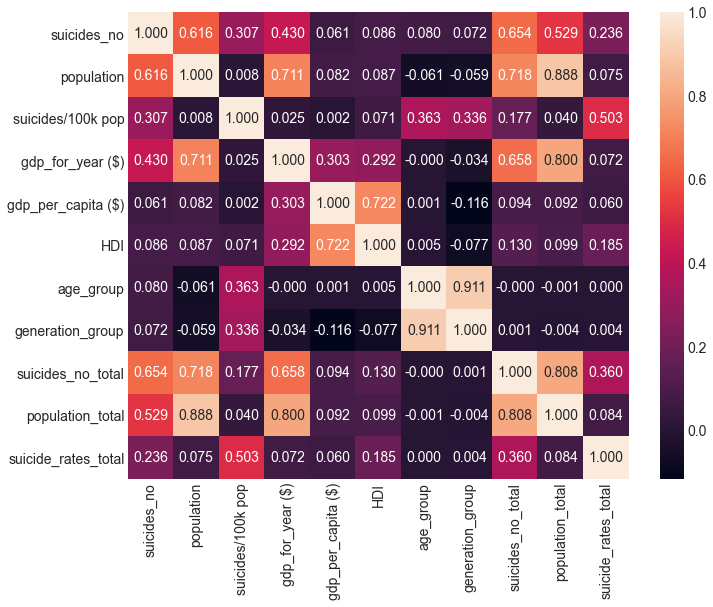

In [72]:
plt.figure(figsize=(10, 8))

sns.heatmap(df.drop(['year'], axis=1).corr(), annot=True, fmt='.3f')
plt.show()

Unfortunately, the relationship between **suicides_no_total** (or **suicide_rates_total**) and **gdp_for_year(\\$)** is not as strong as I was expecting it to be.

**age_group** and **generation_group** columns I have created did not result in a meaningful correlation neither.

However, there is a **_strong negative correlation_** between '**gpd_per_capita (\\$)**' and '**suicides/100k pop**' (suicide rates for each year, age_group, gender, group) columns, and a positive correlation between '**gdp_for_year (\\$)**' and '**population**' columns. Since our target variable is the number/rate of suicides, we are not particularly interested in the relationship between GDP and Population. There is also a strong correlation between **suicides_no_total** and **population_total**, but it is already expected.

Let's see the relationship between '**gpd_per_capita (\\$)**' and '**suicides/100k pop**' columns then!

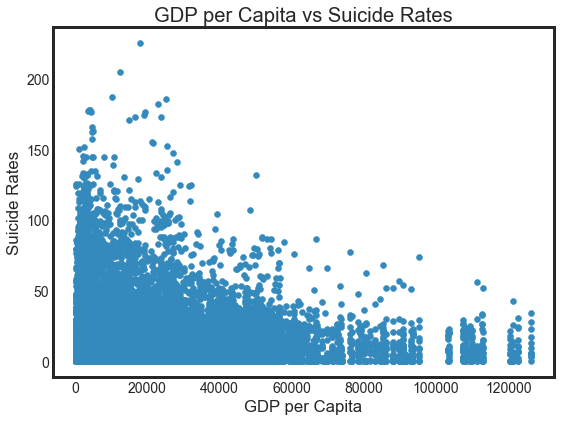

In [73]:
plt.figure(figsize=(8, 6))

plt.scatter(df['gdp_per_capita ($)'], df['suicides/100k pop'])
plt.title('GDP per Capita vs Suicide Rates')
plt.xlabel('GDP per Capita')
plt.ylabel('Suicide Rates')

plt.show()

## Conclusion

Overall, we can conclude that:

- In terms of **gender**, **_men_** commit suicide much more than **_women_**, both worldwide and for each country.
- The **age group** with most suicide counts is **_35-54 years_** age group, while the **generation** with most suicide counts is **_Boomers_**.
- Worldwide, there is a sharp increase in suicide counts between the **years** **_1988_** and **_2000_**.
- **Human Development Index (HDI)** does not seem to have a high correlation between **suicide rates**.
- **Gross Domestic Product (GDP)** has a **_strong correlation_** with **suicide rates**, especially when the suicide rates is divided into year, gender and age groups (i.e., 'suicide/100k pop' column).